In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
from file_processing import *

In [3]:
dataset_path = 'data/sets/categories_castle_cafe_categories_blurred_photos_removed/train/'

In [4]:
img = cv2.imread(os.path.join(dataset_path, '1/IMG_20191124_204714689.jpg'))

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
orb = cv2.ORB_create()

In [7]:
key_points, description = orb.detectAndCompute(img, None)

In [8]:
img_keypoints = cv2.drawKeypoints(img,
                                  key_points,
                                  img,
                                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

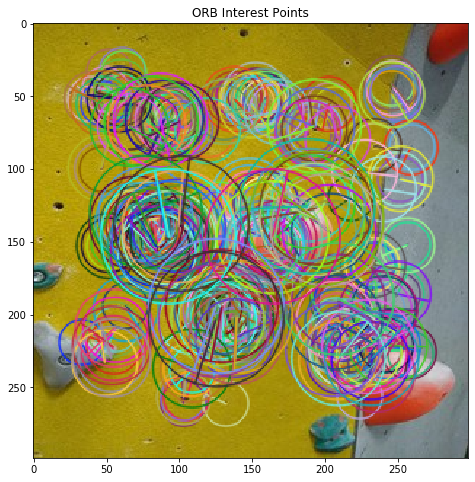

In [9]:
plt.figure(figsize=(8, 8))
plt.title('ORB Interest Points')
plt.imshow(img_keypoints); plt.show()

In [47]:
def image_detect_and_compute(detector, img_name):
    """Detect and compute interest points and their descriptors."""
    img = cv2.imread(os.path.join(dataset_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des
    

def draw_image_matches(detector, img1_name, img2_name, nmatches=10):
    """Draw ORB feature matches of the given two images."""
    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance) # Sort matches by distance.  Best come first.
    
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2) # Show top 10 matches
#     print('Total distance:')
#     print(sum([x.distance for x in matches[:nmatches]]))
    plt.figure(figsize=(8, 8))
    plt.title(type(detector))
    plt.imshow(img_matches); plt.show()
    return sum([x.distance for x in matches[:nmatches]])

In [19]:
d = {}

In [20]:
for c in range(1, 47): 
    c_path = os.path.join(dataset_path, str(c))
    files = get_filenames(c_path)
    c_dict = {}
    for i, f in enumerate(files):
        for nc in range(1, 47):
            nc_path = os.path.join(dataset_path, str(nc))
            nc_files = get_filenames(nc_path)
            for ni, nf in enumerate(nc_files):
                if i != ni:  # to repvent distnace on itself
                    orb = cv2.ORB_create()
                    print(f'{c}/{f} versus {nc}/{nf}' )
                    dist = draw_image_matches(orb, f'{c}/{f}', f'{nc}/{nf}') 
                    c_dict[f'{f}-{nc}-{nf}'] = dist
    d[f'{c}'] = c_dict

1/IMG_20191215_092128.jpg versus 1/IMG_20191215_092201416.jpg
1/IMG_20191215_092128.jpg versus 1/IMG_20191124_204714689.jpg
1/IMG_20191215_092128.jpg versus 1/IMG_20191212_215744274.jpg
1/IMG_20191215_092128.jpg versus 1/IMG_20191124_204716712.jpg
1/IMG_20191215_092128.jpg versus 2/IMG_20191124_204513.jpg
1/IMG_20191215_092128.jpg versus 2/IMG_20191124_204729508.jpg
1/IMG_20191215_092128.jpg versus 2/IMG_20191215_092136.jpg
1/IMG_20191215_092128.jpg versus 2/IMG_20191212_215109986.jpg
1/IMG_20191215_092128.jpg versus 3/IMG_20191212_215118031.jpg
1/IMG_20191215_092128.jpg versus 3/IMG_20191212_215251.jpg
1/IMG_20191215_092128.jpg versus 3/IMG_20191215_092144.jpg
1/IMG_20191215_092128.jpg versus 3/IMG_20191124_204739960.jpg
1/IMG_20191215_092128.jpg versus 4/IMG_20191215_092148.jpg
1/IMG_20191215_092128.jpg versus 4/IMG_20191124_204758474.jpg
1/IMG_20191215_092128.jpg versus 4/IMG_20191124_204538.jpg
1/IMG_20191215_092128.jpg versus 4/IMG_20191124_204755700.jpg
1/IMG_20191215_092128.jpg 

In [29]:
d

{'1': {'IMG_20191215_092128.jpg-1-IMG_20191215_092201416.jpg': 134.0,
  'IMG_20191215_092128.jpg-1-IMG_20191124_204714689.jpg': 229.0,
  'IMG_20191215_092128.jpg-1-IMG_20191212_215744274.jpg': 366.0,
  'IMG_20191215_092128.jpg-1-IMG_20191124_204716712.jpg': 239.0,
  'IMG_20191215_092128.jpg-2-IMG_20191124_204513.jpg': 423.0,
  'IMG_20191215_092128.jpg-2-IMG_20191124_204729508.jpg': 457.0,
  'IMG_20191215_092128.jpg-2-IMG_20191215_092136.jpg': 422.0,
  'IMG_20191215_092128.jpg-2-IMG_20191212_215109986.jpg': 450.0,
  'IMG_20191215_092128.jpg-3-IMG_20191212_215118031.jpg': 404.0,
  'IMG_20191215_092128.jpg-3-IMG_20191212_215251.jpg': 377.0,
  'IMG_20191215_092128.jpg-3-IMG_20191215_092144.jpg': 402.0,
  'IMG_20191215_092128.jpg-3-IMG_20191124_204739960.jpg': 372.0,
  'IMG_20191215_092128.jpg-4-IMG_20191215_092148.jpg': 485.0,
  'IMG_20191215_092128.jpg-4-IMG_20191124_204758474.jpg': 462.0,
  'IMG_20191215_092128.jpg-4-IMG_20191124_204538.jpg': 465.0,
  'IMG_20191215_092128.jpg-4-IMG_20191

In [33]:
min_dists = {}
for c, v in d.items():
    min_dist_key = min(v, key=v.get)
    min_dist_dist = min(v.values())
    min_dist_c = min_dist_key.split('-')[1]
    min_dists[c] = [min_dist_c, min_dist_dist]

In [34]:
min_dists

{'1': ['1', 134.0],
 '2': ['2', 141.0],
 '3': ['3', 179.0],
 '4': ['4', 114.0],
 '5': ['5', 104.0],
 '6': ['6', 111.0],
 '7': ['7', 77.0],
 '8': ['8', 89.0],
 '9': ['9', 116.0],
 '10': ['10', 87.0],
 '11': ['11', 76.0],
 '12': ['12', 66.0],
 '13': ['13', 31.0],
 '14': ['14', 199.0],
 '15': ['15', 133.0],
 '16': ['16', 69.0],
 '17': ['17', 157.0],
 '18': ['18', 115.0],
 '19': ['19', 231.0],
 '20': ['20', 106.0],
 '21': ['21', 177.0],
 '22': ['22', 139.0],
 '23': ['23', 118.0],
 '24': ['24', 103.0],
 '25': ['25', 153.0],
 '26': ['20', 335.0],
 '27': ['7', 288.0],
 '28': ['28', 143.0],
 '29': ['23', 413.0],
 '30': ['22', 421.0],
 '31': ['12', 483.0],
 '32': ['12', 381.0],
 '33': ['14', 378.0],
 '34': ['34', 195.0],
 '35': ['5', 286.0],
 '36': ['36', 189.0],
 '37': ['13', 329.0],
 '38': ['20', 342.0],
 '39': ['34', 254.0],
 '40': ['26', 361.0],
 '41': ['41', 235.0],
 '42': ['42', 204.0],
 '43': ['43', 179.0],
 '44': ['44', 206.0],
 '45': ['45', 92.0],
 '46': ['46', 87.0]}

In [35]:
correct = []
wrong = []
for c, v in min_dists.items():
    if c == v[0]:
        correct.append(v[1])
    else:
        wrong.append(v[1])

In [37]:
max(correct)

235.0

In [38]:
min(wrong)

254.0

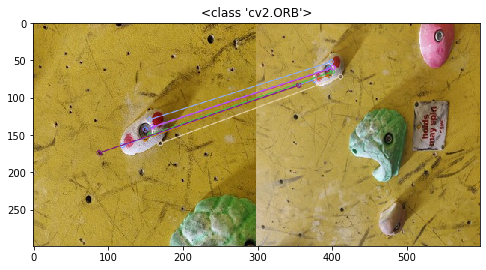

In [42]:
orb = cv2.ORB_create()
_, des = draw_image_matches(orb, '39/IMG_20191212_215717.jpg', '34/IMG_20191215_092657.jpg')

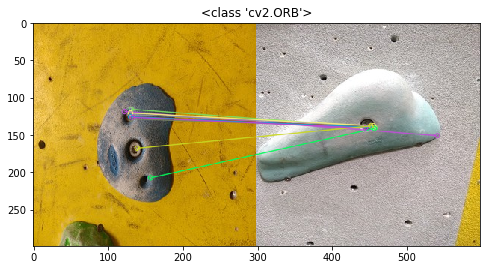

286.0

In [49]:
orb = cv2.ORB_create()
draw_image_matches(orb, '35/IMG_20191215_092702.jpg', '5/IMG_20191212_215130970.jpg')

In [43]:
type(des)

numpy.ndarray

In [45]:
des.shape

(448, 32)

Total distance:
209.0


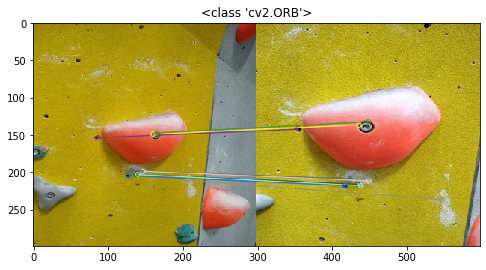

In [52]:
orb = cv2.ORB_create()
draw_image_matches(orb, '1/IMG_20191124_204714689.jpg', '1/IMG_20191215_092201416.jpg')

Total distance:
435.0


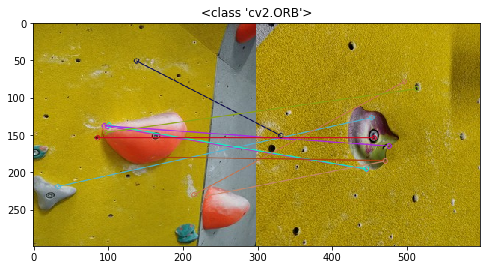

In [54]:
orb = cv2.ORB_create()
draw_image_matches(orb, '1/IMG_20191124_204714689.jpg', '15/IMG_20191124_204820.jpg')

Total distance:
456.0


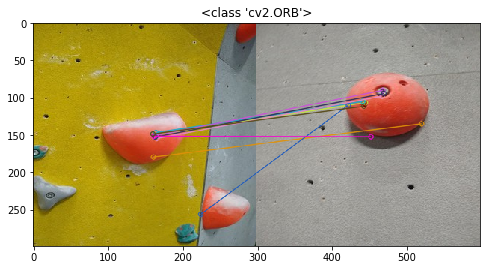

In [56]:
orb = cv2.ORB_create()
draw_image_matches(orb, '1/IMG_20191124_204714689.jpg', '19/IMG_20191124_205053860.jpg')

Total distance:
162.0


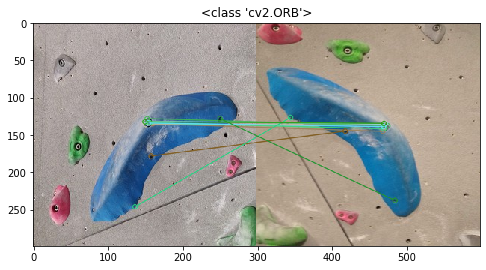

In [57]:
orb = cv2.ORB_create()
draw_image_matches(orb, '25/IMG_20191124_205000.jpg', '25/IMG_20191124_205200602.jpg')

Total distance:
466.0


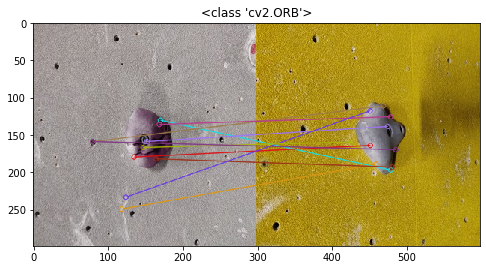

In [58]:
orb = cv2.ORB_create()
draw_image_matches(orb, '18/IMG_20191124_204852.jpg', '14/IMG_20191124_204810.jpg')

In [41]:
total_distance

175.0

In [11]:
detector = orb = cv2.ORB_create()

In [12]:
img1, kp1, des1 = image_detect_and_compute(detector, 'IMG_20191124_204714689.jpg')

In [14]:
img2, kp2, des2 = image_detect_and_compute(detector, 'IMG_20191124_204716712.jpg')

In [15]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [16]:
des1.shape

(355, 32)

In [17]:
des2.shape

(293, 32)

In [23]:
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x: x.distance)

In [38]:
matches[10].distance

20.0

In [40]:
total_distance = sum([x.distance for x in matches[:10]])

In [33]:
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], img2, flags=2)

In [34]:
img_matches.shape

(299, 598, 3)

In [37]:
len(matches)

118